# Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [2]:
df = pd.read_csv("prime.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.shape

(8807, 12)

## Checking for null values

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Let us handle the missing values for the columns in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Data Preprocessing

### Drop show_id

In [9]:
df.drop("show_id" , axis=1 , inplace=True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Drop Duplicate titles

In [10]:
df = df.drop_duplicates(["title"])

In [11]:
print(df["title"].nunique())
print(df.shape[0])

8807
8807


We have removed duplicate title films

### Replace Nan values with Unavailable for cast and director columns

In [12]:
df["cast"] = df["cast"].replace(np.nan , "Unavailable")
df["director"] = df["director"].replace(np.nan , "Unavailable")

### Fill the mode value for missing ratings

In [13]:
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])

### Filling mode value for country

In [14]:
df["country"] = df["country"].fillna(df["country"].mode()[0])

### Filling mode value for date added

In [15]:
df["date_added"] = df["date_added"].fillna("January 01, {}".format(str(df["release_year"].mode()[0])))

In [16]:
import re
months = {'January':1 , 'February':2 , 'March':3 , 'April':4 , 'May':5 , 'June':6 , 'July':7 , 'August':8 , 
          'September':9 , 'October':10 , 'November':11 , 'December':12}

date_list = []

for i in df["date_added"]:
    str1= re.findall('([a-zA-Z]+)\s[0-9]+\,\s[0-9]+' , i)
    str2= re.findall('[a-zA-Z]+\s([0-9]+)\,\s[0-9]+' , i)
    str3= re.findall('[a-zA-Z]+\s[0-9]+\,\s([0-9]+)' , i)
    dates = '{}-{}-{}'.format(str2[0] , months[str1[0]] , str3[0])
    date_list.append(dates)

In [17]:
df["date_added_cleaned"] = date_list

In [18]:
df['date_added_cleaned']=df['date_added_cleaned'].astype('datetime64[ns]')

In [19]:
for i , j in zip(df["country"].values , df.index):
    if i == np.nan:
        if (('Anime' in df.loc[j,'listed_in']) or ('anime' in df.loc[j,'listed_in'])):
            print(j)
            df.loc[j,'country'] ='Japan'
        elif (('Western' in df.loc[j,'listed_in']) or ('western' in df.loc[j,'listed_in'])):
            print(j)
            df.loc[j,'country'] ='United States'
        else:
            continue
    else:
        continue

### Dropping duration column which has 3 null rows

In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

type                  0
title                 0
director              0
cast                  0
country               0
date_added            0
release_year          0
rating                0
duration              0
listed_in             0
description           0
date_added_cleaned    0
dtype: int64

# EDA / Analytics

### 1. Count of ratings for the dataset

In [22]:
for i in df.index:
    if df.loc[i,"rating"]== "NOT_RATE":
        df.loc[i,"rating"] = "UNRATED"
    elif df.loc[i,"rating"]== "AGES_18_":
        df.loc[i,"rating"] = "18+"
    elif (df.loc[i,"rating"]== "AGES_16_") or (df.loc[i,"rating"]== "16"):
        df.loc[i,"rating"] = "16+"
    elif df.loc[i,"rating"]== "ALL_AGES":
        df.loc[i,"rating"] = "G"
    else:
        continue

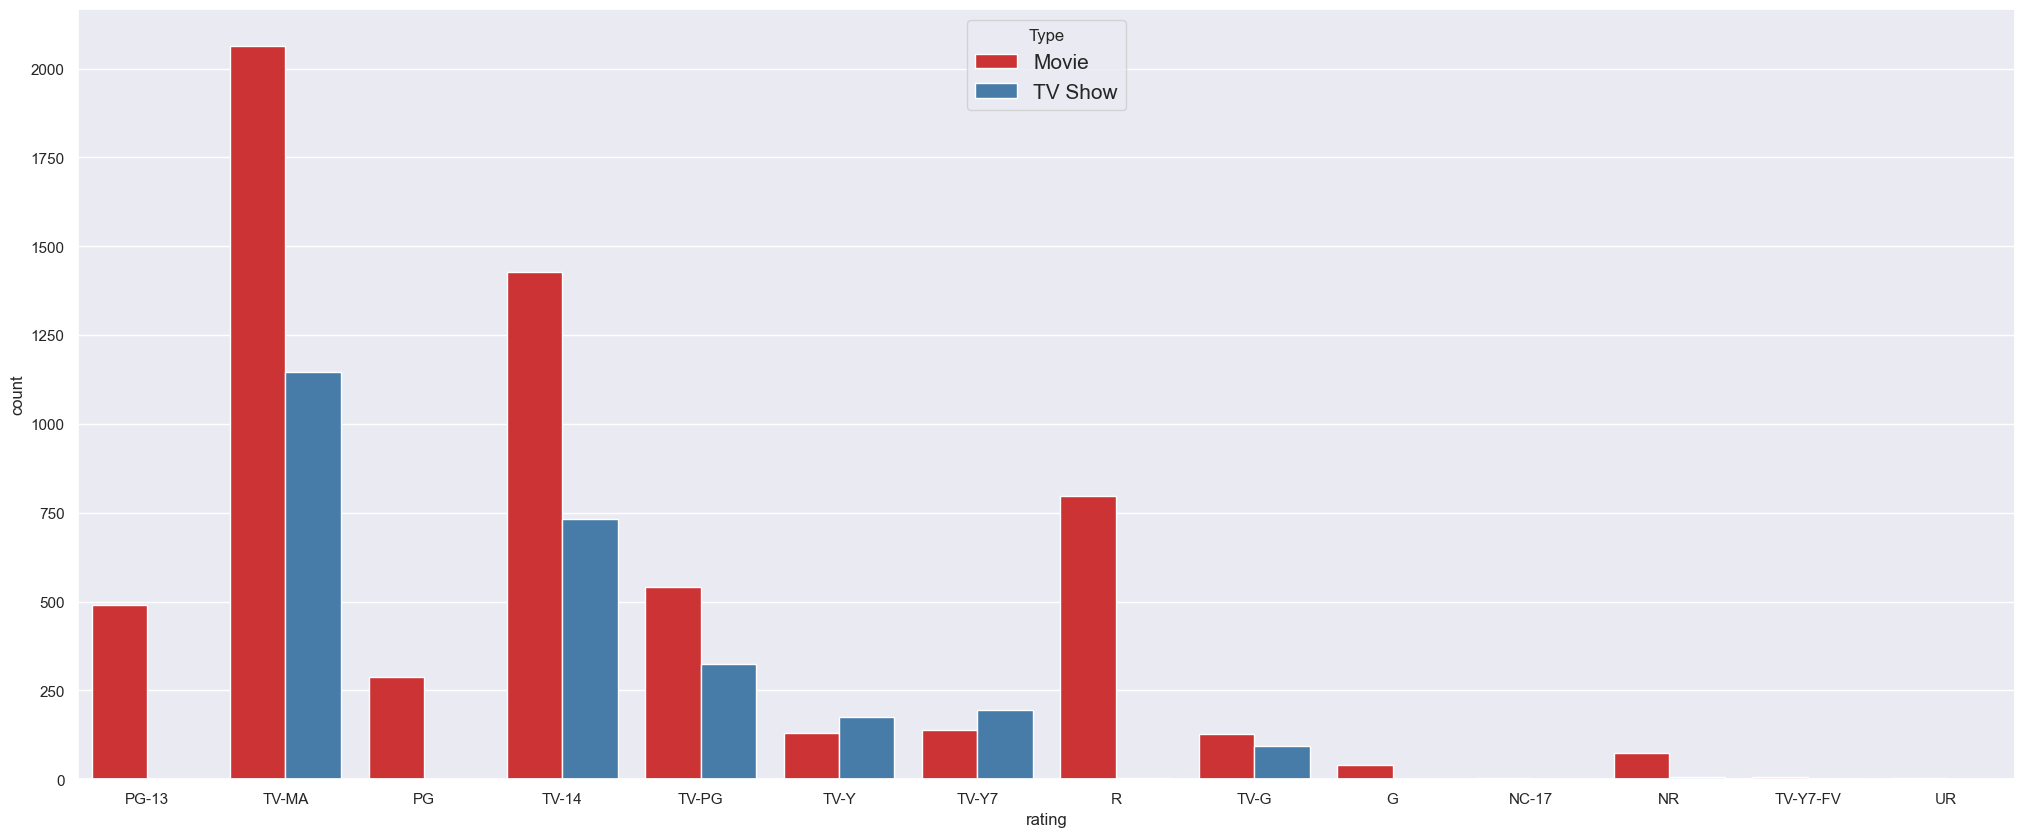

In [23]:
plt.figure(figsize=(25,10))
sns.set_theme(style="darkgrid")
sns.countplot(x="rating", hue="type" , data=df, palette="Set1")
plt.legend(loc='upper center', title="Type", fontsize=15)

Movies are more available than TV Show in Amazon Prime

### 2. Most popular ratings category

<AxesSubplot: >

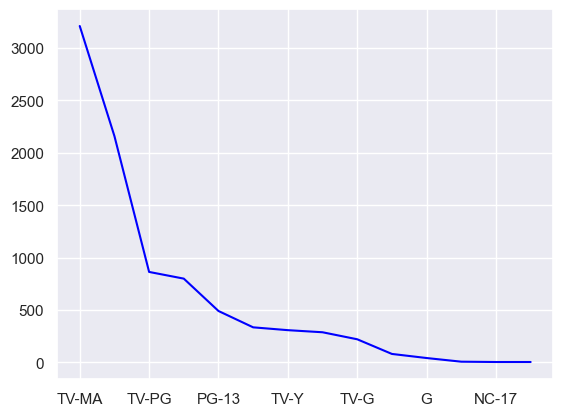

In [24]:
df["rating"].value_counts().plot(color = "blue")

TV-MA rating is most popularly uploaded category in Amazon Prime

### 3. Movie and TV Show Ratio

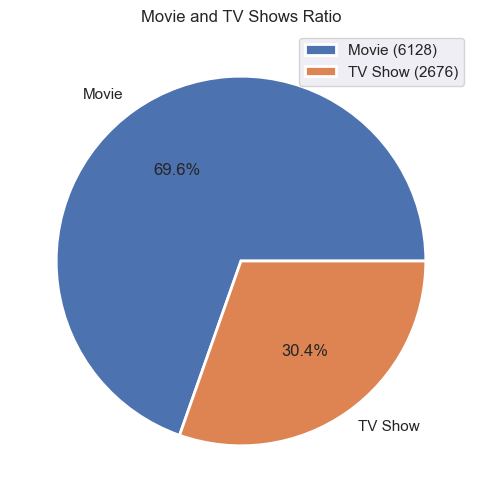

In [25]:
df_pie = df['type'].copy().value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    x=df_pie.values,labels=df_pie.index,autopct='%.1f%%',
    wedgeprops={'linewidth':2.0,'edgecolor':'white'}
)

plt.title('Movie and TV Shows Ratio')
plt.legend(labels=[f"{label} ({count})" for label, count in zip(df_pie.index, df_pie.values)],loc='best')
plt.show()

Movies contribute to about nearly **70%** of the content.

### 4. Distribution of Prime movies & shows across ratings

Text(0.5, 1.0, 'Distribution of Prime movies & shows across ratings')

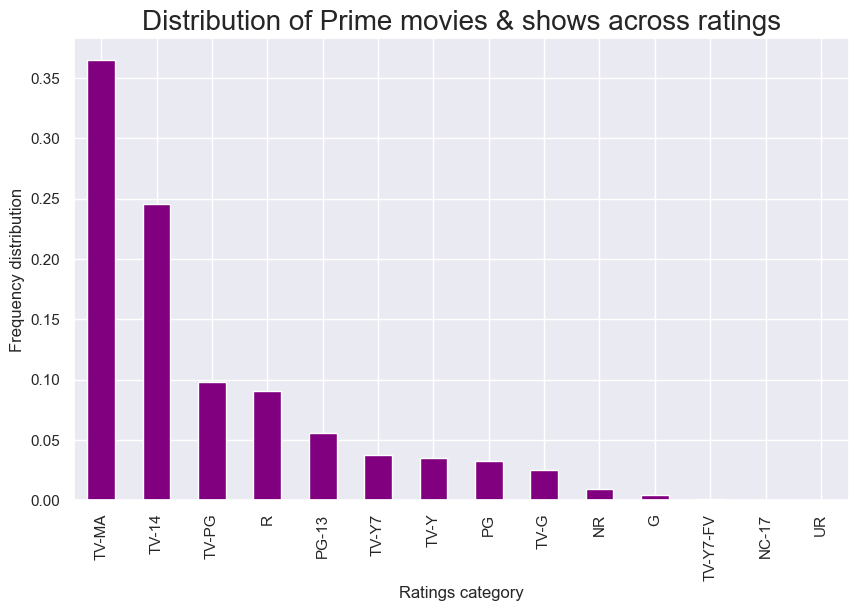

In [26]:
plt.figure(figsize=(10,6))
df["rating"].value_counts(normalize =True).plot(kind="bar", color = "purple")
plt.xlabel("Ratings category")
plt.ylabel("Frequency distribution")
plt.title("Distribution of Prime movies & shows across ratings" , fontsize=20)

Frequency distribution of TV-MA content is more in Amazon Prime.

### 5. Analysing Top 5 countries

In [27]:
df["country"].value_counts().sort_values(ascending=False)

United States                                           3646
India                                                    972
United Kingdom                                           419
Japan                                                    245
South Korea                                              199
                                                        ... 
Ireland, United Kingdom, Greece, France, Netherlands       1
France, Canada, Italy, United States, China                1
United States, Venezuela                                   1
United Kingdom, Canada, Japan                              1
United Arab Emirates, Jordan                               1
Name: country, Length: 748, dtype: int64

In [28]:
top5 = df[(df["country"]=="United States") | (df["country"]=="India") | (df["country"]=="United Kingdom") | 
             (df["country"]=="Japan") | (df["country"]=="South Korea")]

Text(0.5, 1.0, 'Comparing Content Type available in Top 5 countries')

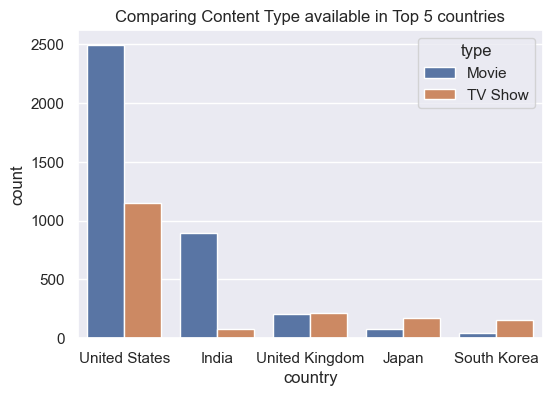

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x="country" , hue="type" , data=top5, palette="deep")
plt.title("Comparing Content Type available in Top 5 countries", fontsize=12)

Various content types in top 5 countries show that movies are a major source of content for Prime Video.

### 6. Distribution of rating-based movies and shows in Top 5 countries

Text(0.5, 1.0, 'Distribution of rating-based movies and shows in Top 5 countries')

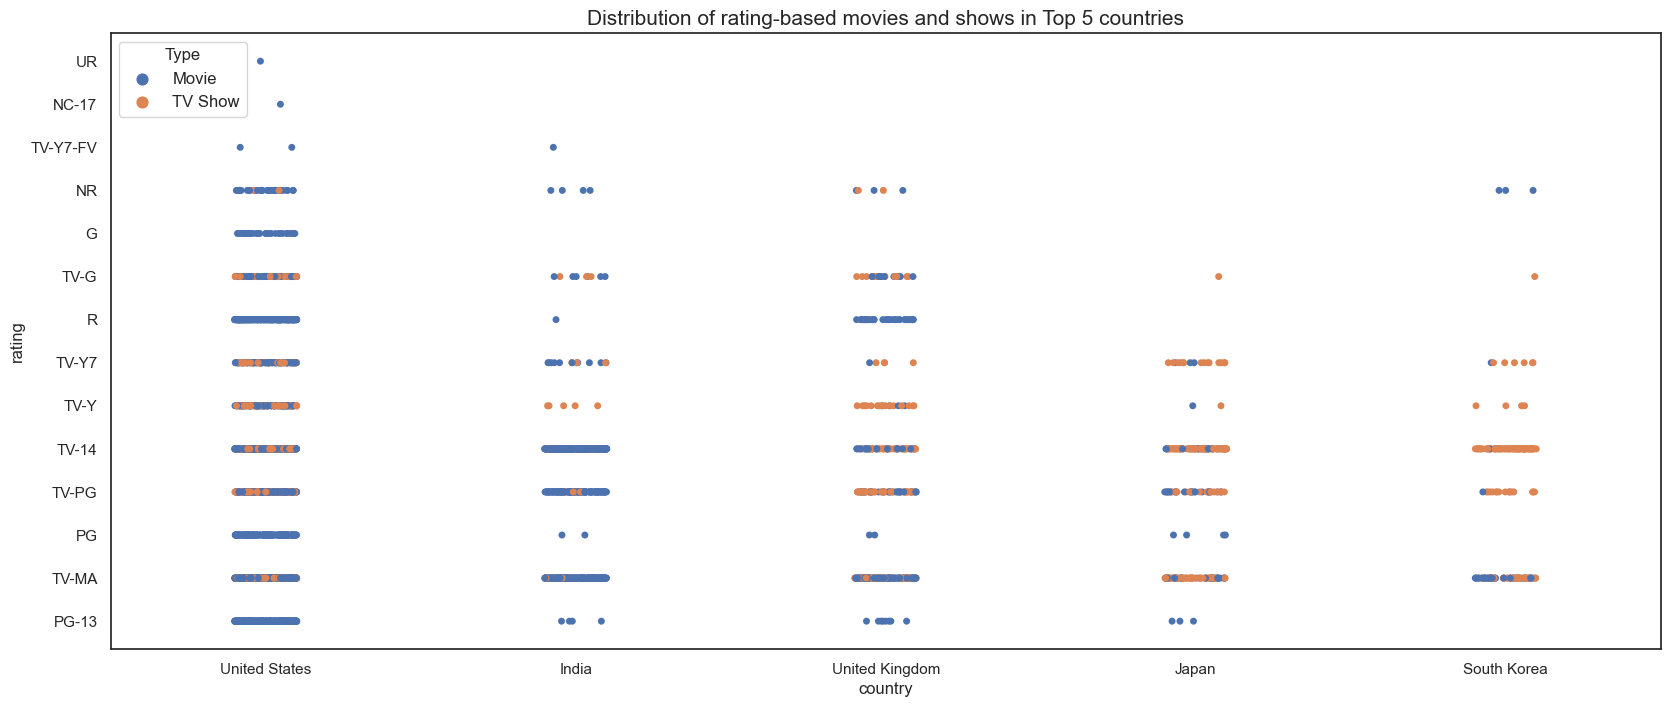

In [30]:
plt.figure(figsize=(20,8))
sns.set_theme(style = "white")
sns.stripplot(x="country" , y="rating" , hue="type", data=top5 , order=["United States" , "India" , "United Kingdom" , "Japan", "South Korea"])
plt.legend(loc="upper left" , title="Type" , fontsize=12)
plt.title("Distribution of rating-based movies and shows in Top 5 countries", fontsize=15)

### 7. Different show categories and its count

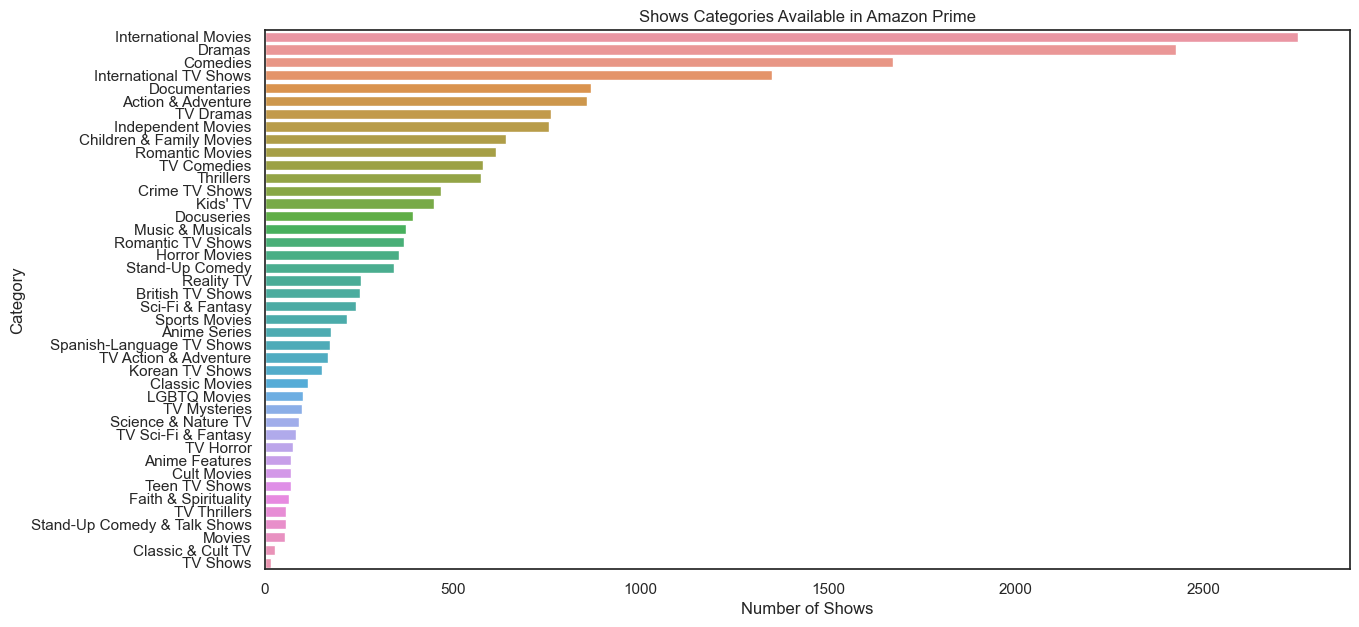

In [31]:
categories_shows = df['listed_in'].str.split(', ').explode().value_counts()
plt.figure(figsize=(14,7))
sns.barplot(y=categories_shows.index,x=categories_shows.values,orient='horizontal')
plt.ylabel('Category')
plt.xlabel('Number of Shows')
plt.title('Shows Categories Available in Amazon Prime')
plt.show()

**International Movies** category occupies the top place in **Show Categories**.